# Inciso A

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el CSV con los datos reales
df = pd.read_csv(r"D:\Ciencia de Datos\6to\Visualizacion\Practicas\Practica9\divorcios_ed2023\conjunto_de_datos_ed2023.csv")

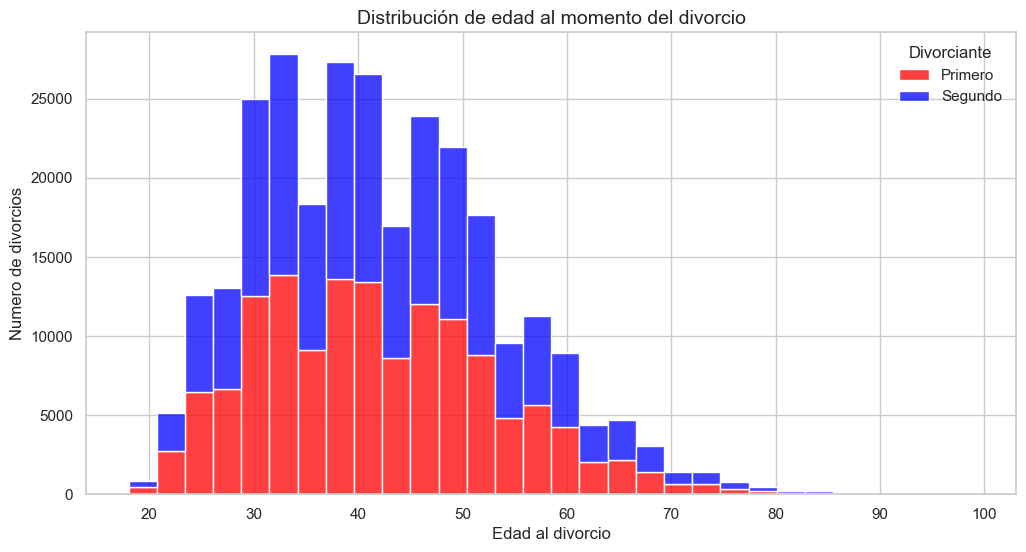

In [46]:
df["edad_div1"] = pd.to_numeric(df["edad_div1"], errors="coerce")
df["edad_div2"] = pd.to_numeric(df["edad_div2"], errors="coerce")

# Asegúrate de convertir las columnas de edad a numérico, por si vienen como texto
df = df[(df["edad_div1"] != 999) & (df["edad_div2"] != 999)]
df = df.dropna(subset=["edad_div1", "edad_div2"])
plt.figure(figsize=(12, 6))
sns.histplot(data=df[["edad_div1", "edad_div2"]].melt(), 
             x="value", 
             hue="variable", 
             multiple="stack", 
             palette=["blue", "red"],
             bins=30)
plt.title("Distribución de edad al momento del divorcio")
plt.xlabel("Edad al divorcio")
plt.ylabel("Numero de divorcios")
plt.legend(title="Divorciante", labels=["Primero", "Segundo"])
plt.show()

# Inciso B

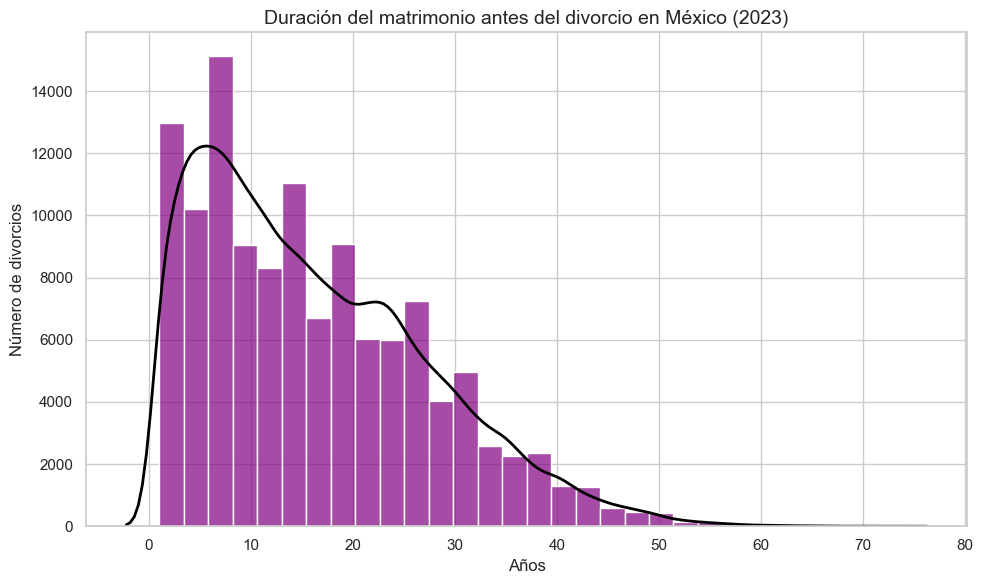

In [58]:
# Asegurar que la columna dura_soc sea numérica
df["dura_soc"] = pd.to_numeric(df["dura_soc"], errors="coerce")

# Eliminar valores nulos o inválidos
df = df.dropna(subset=["dura_soc"])

# Filtrar valores extremos si es necesario (por ejemplo, duración negativa o excesiva)
df = df[(df["dura_soc"] >= 0) & (df["dura_soc"] <= 80)]

# Crear histograma de duración del matrimonio (en frecuencia)
plt.figure(figsize=(10, 6))

# Histograma (frecuencia absoluta)
ax = sns.histplot(df["dura_soc"], bins=30, color="purple", stat="count", alpha=0.7, label="Frecuencia")

# Calcular y escalar la KDE para que coincida con el histograma
kde = sns.kdeplot(df["dura_soc"], color="black", linewidth=2, label="KDE")
kde_y = kde.get_lines()[0].get_data()[1]  # Obtener valores Y de la KDE
kde_scaling_factor = len(df) * (max(df["dura_soc"]) - min(df["dura_soc"])) / 30  # Ajuste para frecuencia
ax.get_lines()[0].set_ydata(kde_y * kde_scaling_factor)  # Escalar KDE

# Personalización
plt.title("Duración del matrimonio antes del divorcio en México (2023)")
plt.xlabel("Años")
plt.ylabel("Número de divorcios")
#plt.legend()
plt.tight_layout()
plt.show()

# Inciso C

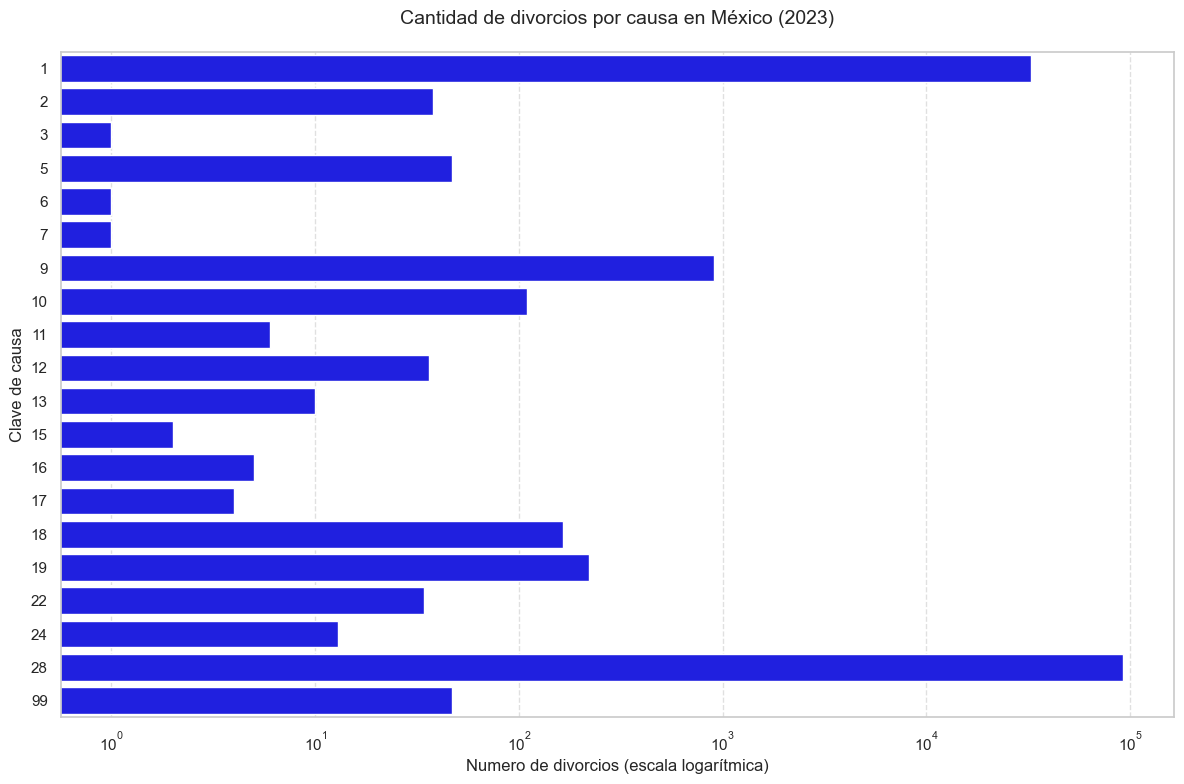

In [49]:
df = df.dropna(subset=["causa"])

# Contar divorcios por causa y ordenar de MENOR a MAYOR (para destacar las pequeñas)
causas_count = df["causa"].value_counts().reset_index()
causas_count.columns = ["causa", "cantidad"]
causas_count = causas_count.sort_values(by="cantidad", ascending=True)  # Orden crítico

# Configuración del gráfico
plt.figure(figsize=(12, 8))  # Más altura para mejor legibilidad

# Gráfico de barras HORIZONTALES (todas las barras en azul)
sns.barplot(
    data=causas_count,
    y="causa",  # Eje Y para las causas
    x="cantidad",  # Eje X para la cantidad
    color="blue",  # Todas las barras del mismo color
    orient="h"  # Orientación horizontal
)

# Ajustes estéticos
plt.title("Cantidad de divorcios por causa en México (2023)", pad=20)
plt.xlabel("Cantidad de divorcios")
plt.ylabel("Clave de causa")
plt.grid(axis="x", linestyle="--", alpha=0.6)  # Líneas de guía horizontales

# Escala logarítmica opcional (comenta si no la necesitas)
plt.xscale("log")
plt.xlabel("Numero de divorcios (escala logarítmica)")

# Ajustar márgenes y mostrar
plt.tight_layout()
plt.show()

# Inciso D

C:\Users\ENRIQUE\AppData\Local\Temp\ipykernel_21200\2979743127.py:49: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




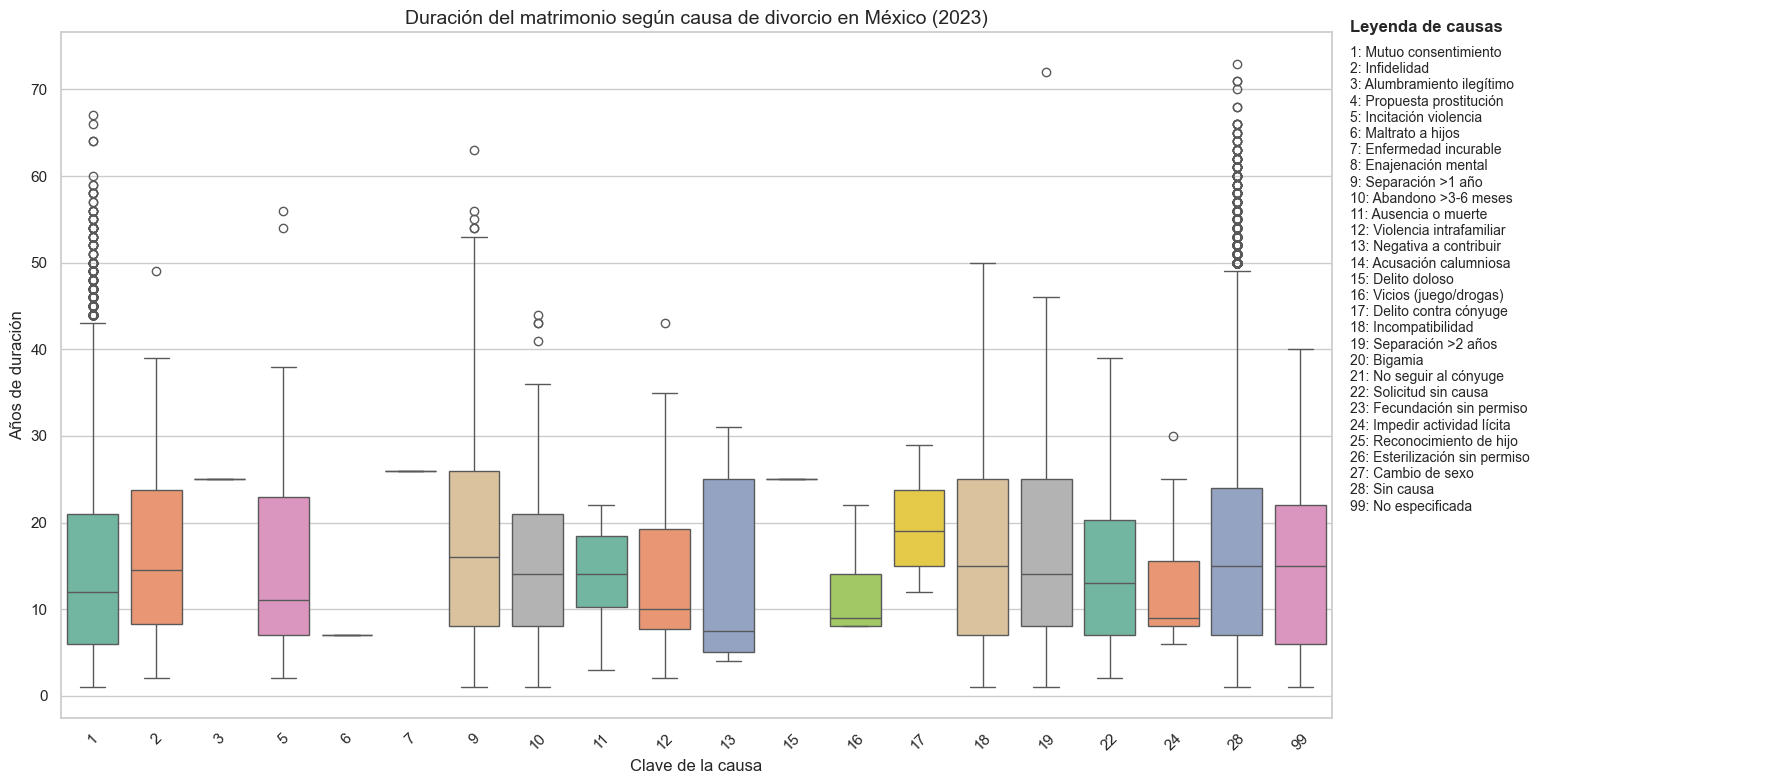

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir columnas necesarias a numérico si es necesario
df["dura_soc"] = pd.to_numeric(df["dura_soc"], errors="coerce")

# Eliminar filas con datos nulos o inválidos
df = df.dropna(subset=["dura_soc", "causa"])
df = df[(df["dura_soc"] >= 0) & (df["dura_soc"] <= 80)]

# Diccionario de claves a descripciones resumidas
causas_dict = {
    1: "Mutuo consentimiento",
    2: "Infidelidad",
    3: "Alumbramiento ilegítimo",
    4: "Propuesta prostitución",
    5: "Incitación violencia",
    6: "Maltrato a hijos",
    7: "Enfermedad incurable",
    8: "Enajenación mental",
    9: "Separación >1 año",
    10: "Abandono >3-6 meses",
    11: "Ausencia o muerte",
    12: "Violencia intrafamiliar",
    13: "Negativa a contribuir",
    14: "Acusación calumniosa",
    15: "Delito doloso",
    16: "Vicios (juego/drogas)",
    17: "Delito contra cónyuge",
    18: "Incompatibilidad",
    19: "Separación >2 años",
    20: "Bigamia",
    21: "No seguir al cónyuge",
    22: "Solicitud sin causa",
    23: "Fecundación sin permiso",
    24: "Impedir actividad lícita",
    25: "Reconocimiento de hijo",
    26: "Esterilización sin permiso",
    27: "Cambio de sexo",
    28: "Sin causa",
    99: "No especificada"
}

# Crear figura con subplots: uno para gráfico, otro para leyenda
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 8), gridspec_kw={'width_ratios': [3, 1]})

# Gráfico boxplot con clave numérica
sns.boxplot(data=df, x="causa", y="dura_soc", palette="Set2", ax=ax1)
ax1.set_title("Duración del matrimonio según causa de divorcio en México (2023)")
ax1.set_xlabel("Clave de la causa")
ax1.set_ylabel("Años de duración")
ax1.tick_params(axis='x', rotation=45)

# Leyenda en el segundo subplot (como tabla)
ax2.axis('off')  # Ocultar ejes
leyenda_texto = "\n".join([f"{k}: {v}" for k, v in causas_dict.items()])
ax2.text(0, 1, "Leyenda de causas", fontsize=12, fontweight='bold')
ax2.text(0, 0.98, leyenda_texto, fontsize=10, va='top')

plt.tight_layout()
plt.show()

# Inciso E

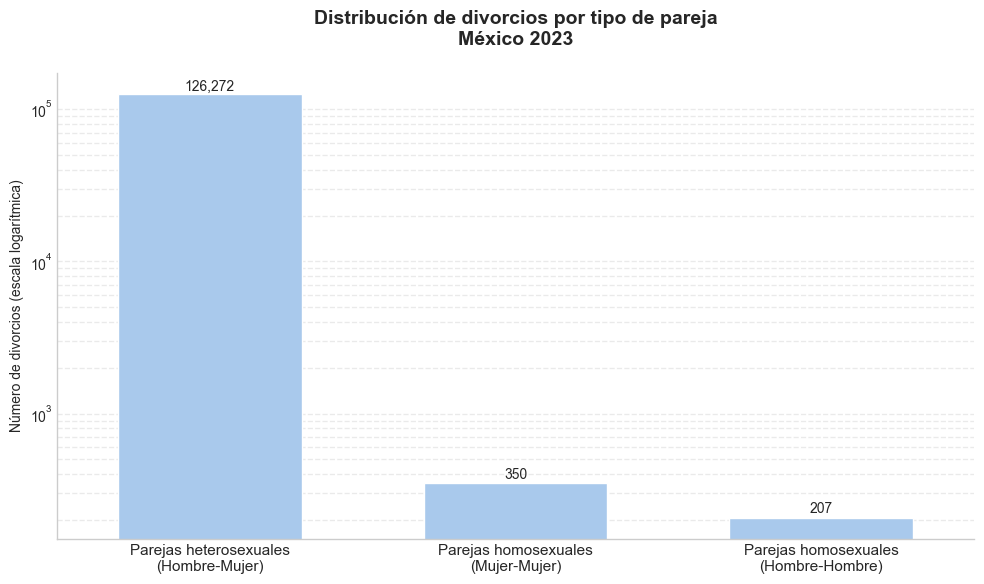

In [51]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("pastel")

# Preprocesamiento (manteniendo tu lógica original)
df["sexo_div1"] = pd.to_numeric(df["sexo_div1"], errors="coerce")
df["sexo_div2"] = pd.to_numeric(df["sexo_div2"], errors="coerce")
df = df.dropna(subset=["sexo_div1", "sexo_div2"])

# Clasificación mejorada
def clasificar_pareja(s1, s2):
    if {s1, s2} == {1, 2}:
        return "Parejas heterosexuales\n(Hombre-Mujer)"
    elif s1 == 1 and s2 == 1:
        return "Parejas homosexuales\n(Hombre-Hombre)"
    elif s1 == 2 and s2 == 2:
        return "Parejas homosexuales\n(Mujer-Mujer)"
    else:
        return "Otras combinaciones"

df["tipo_pareja"] = df.apply(lambda row: clasificar_pareja(row["sexo_div1"], row["sexo_div2"]), axis=1)

# Conteo y preparación de datos
conteo = df["tipo_pareja"].value_counts().reset_index()
conteo.columns = ["tipo_pareja", "cantidad"]

# Creación del gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=conteo,
    x="tipo_pareja",
    y="cantidad",
    order=conteo.sort_values("cantidad", ascending=False)["tipo_pareja"],
    saturation=0.8,
    width=0.6
)

# Mejoras visuales
plt.title("Distribución de divorcios por tipo de pareja\nMéxico 2023", 
          fontsize=14, pad=20, fontweight='bold')
plt.xlabel("")
plt.ylabel("Número de divorcios", fontsize=12)

# Añadir etiquetas con formato
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5,
            f'{int(height):,}',
            ha="center", va="bottom",
            fontsize=10)

# Ajustes finales
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Opcional: Escala logarítmica si hay mucha diferencia
if conteo["cantidad"].max() / conteo["cantidad"].min() > 100:
    ax.set_yscale('log')
    ax.set_ylabel("Número de divorcios (escala logarítmica)", fontsize=10)
    plt.grid(axis='y', which='both', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

# Inciso F

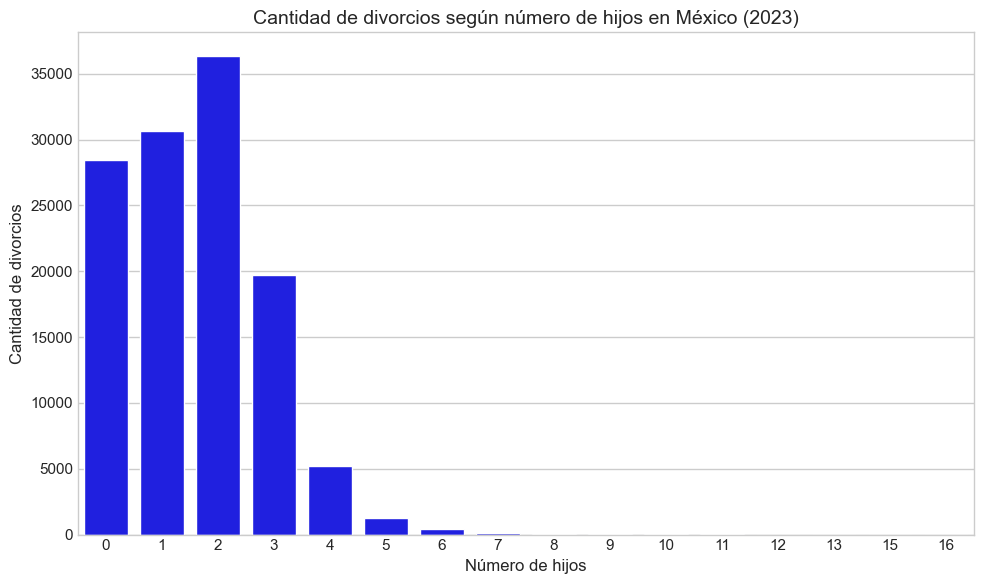

In [52]:
# Limpiar y convertir columna 'hijos'
df["hijos"] = df["hijos"].replace("Ninguno", "0")
df["hijos"] = pd.to_numeric(df["hijos"], errors="coerce")

# Eliminar nulos o inválidos y filtrar 98 y 99
df = df.dropna(subset=["hijos"])
df = df[(df["hijos"] >= 0) & (df["hijos"] < 98)]

# Contar frecuencia por número de hijos
conteo = df["hijos"].value_counts().sort_index().reset_index()
conteo.columns = ["numero_de_hijos", "cantidad"]

# Graficar con barras azules
plt.figure(figsize=(10, 6))
sns.barplot(
    data=conteo,
    x="numero_de_hijos",
    y="cantidad",
    color="blue"  # Todas las barras en azul
)

plt.title("Cantidad de divorcios según número de hijos en México (2023)")
plt.xlabel("Número de hijos")
plt.ylabel("Cantidad de divorcios")
plt.tight_layout()
plt.show()

# Inciso G

C:\Users\ENRIQUE\AppData\Local\Temp\ipykernel_21200\2771115497.py:35: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




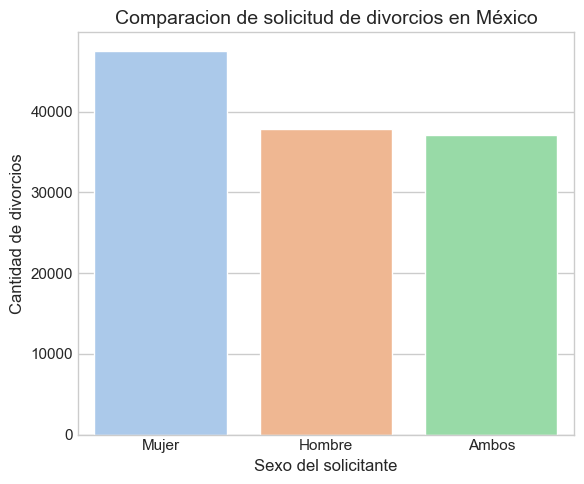

In [53]:
df["ini_juic"] = pd.to_numeric(df["ini_juic"], errors="coerce")
df["sexo_div1"] = pd.to_numeric(df["sexo_div1"], errors="coerce")
df["sexo_div2"] = pd.to_numeric(df["sexo_div2"], errors="coerce")

# Filtrar los registros válidos (excluir 'No especificado')
df = df[df["ini_juic"].isin([1, 2, 3])]

# Función para determinar sexo del solicitante
def sexo_solicitante(row):
    if row["ini_juic"] == 1:
        return row["sexo_div1"]
    elif row["ini_juic"] == 2:
        return row["sexo_div2"]
    elif row["ini_juic"] == 3:
        # Ambos: si son del mismo sexo, regresa ese sexo; si son distintos, regresa "Ambos"
        if row["sexo_div1"] == row["sexo_div2"]:
            return row["sexo_div1"]
        else:
            return "Ambos"

# Aplicar la función
df["sexo_solicitante"] = df.apply(sexo_solicitante, axis=1)

# Mapear valores a texto
df["sexo_solicitante"] = df["sexo_solicitante"].map({1: "Hombre", 2: "Mujer", "Ambos": "Ambos"})

# Eliminar nulos
df = df.dropna(subset=["sexo_solicitante"])

# Contar y graficar
conteo = df["sexo_solicitante"].value_counts().reset_index()
conteo.columns = ["sexo", "cantidad"]

plt.figure(figsize=(6, 5))
sns.barplot(data=conteo, x="sexo", y="cantidad", palette="pastel")

plt.title("Comparacion de solicitud de divorcios en México")
plt.xlabel("Sexo del solicitante")
plt.ylabel("Cantidad de divorcios")
plt.tight_layout()
plt.show()

# Inciso H

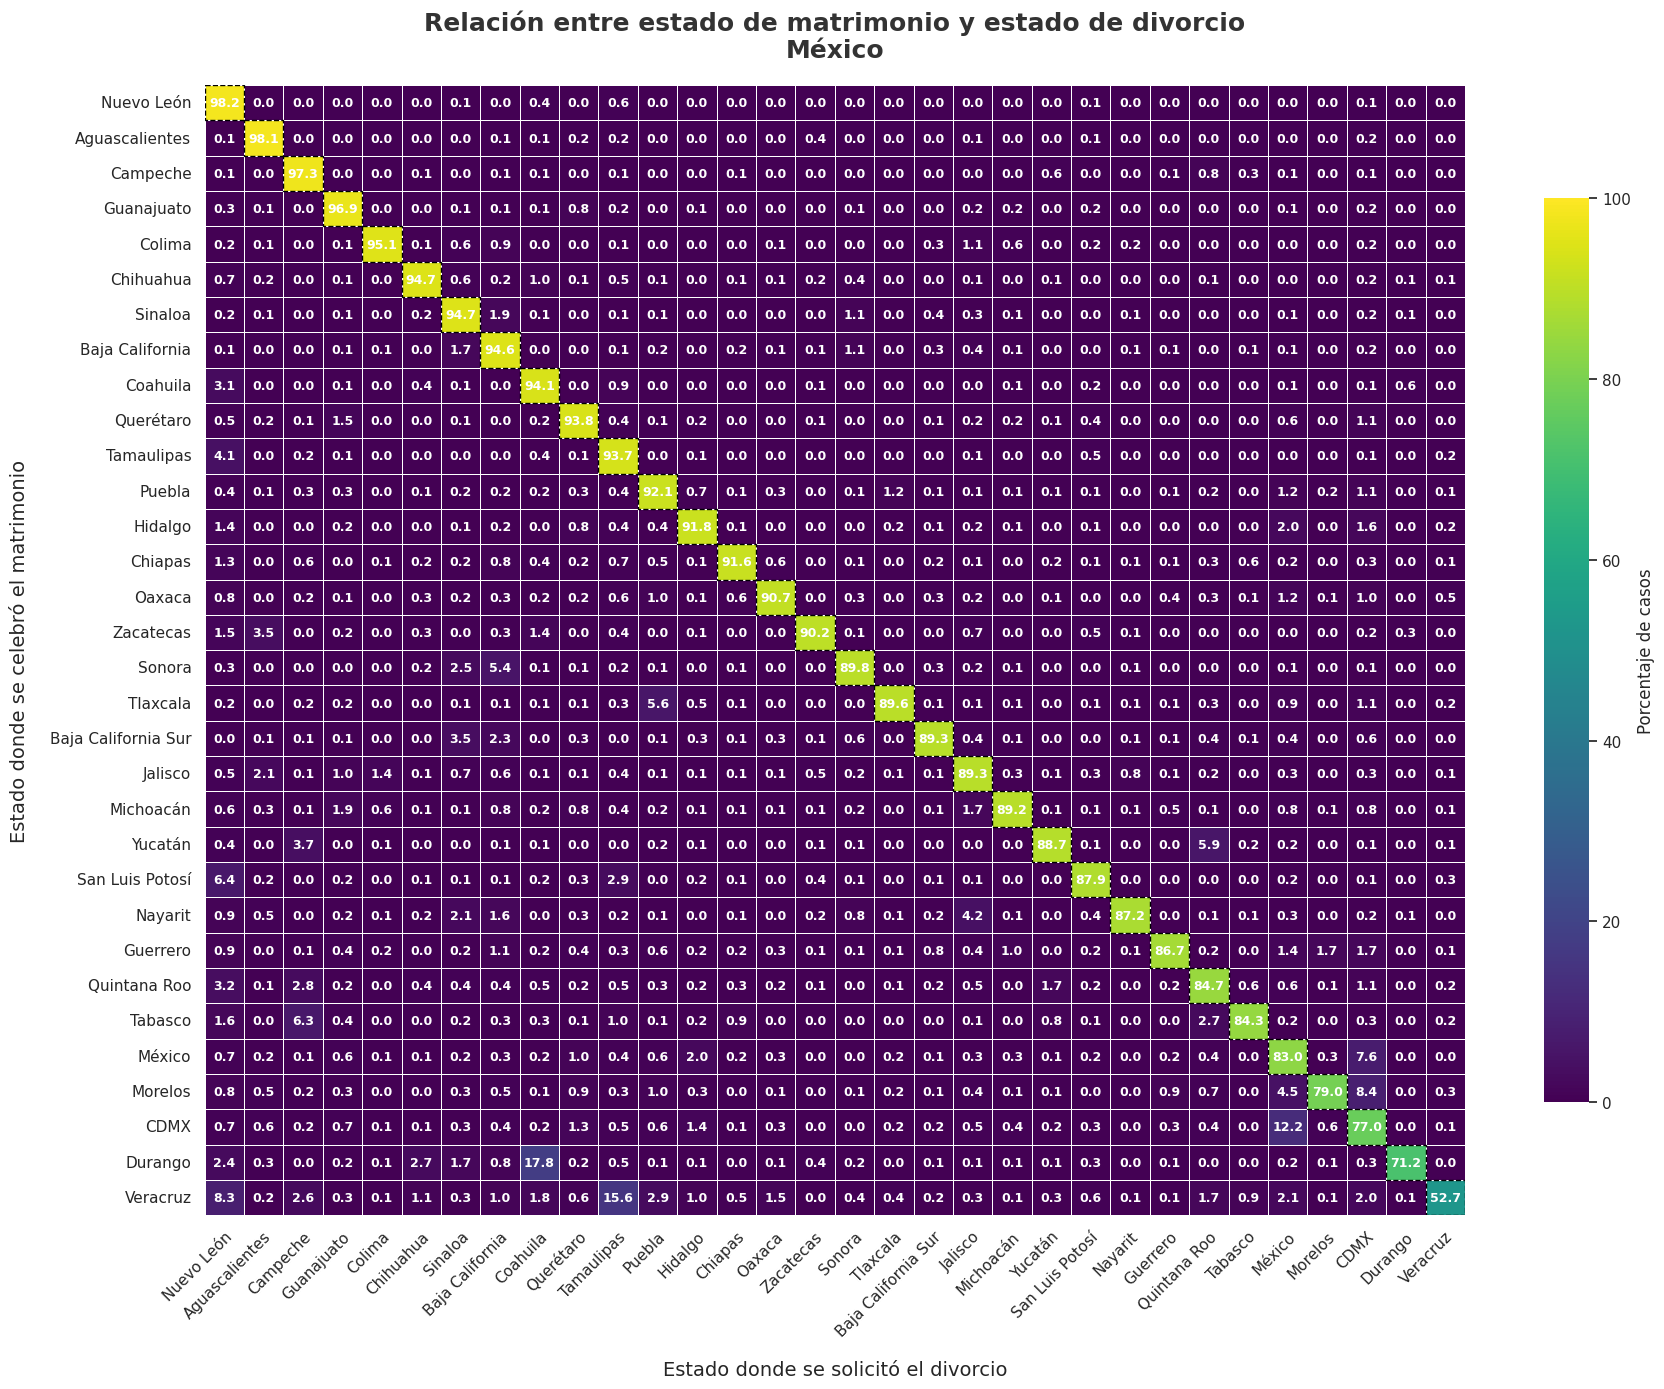

In [61]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

# Mapeo de estados
estados = {
    1: 'Aguascalientes', 2: 'Baja California', 3: 'Baja California Sur',
    4: 'Campeche', 5: 'Coahuila', 6: 'Colima', 7: 'Chiapas', 8: 'Chihuahua',
    9: 'CDMX', 10: 'Durango', 11: 'Guanajuato', 12: 'Guerrero',
    13: 'Hidalgo', 14: 'Jalisco', 15: 'México', 16: 'Michoacán',
    17: 'Morelos', 18: 'Nayarit', 19: 'Nuevo León', 20: 'Oaxaca',
    21: 'Puebla', 22: 'Querétaro', 23: 'Quintana Roo', 24: 'San Luis Potosí',
    25: 'Sinaloa', 26: 'Sonora', 27: 'Tabasco', 28: 'Tamaulipas',
    29: 'Tlaxcala', 30: 'Veracruz', 31: 'Yucatán', 32: 'Zacatecas'
}

# Mapeo a nombres
df['estado_matrimonio'] = df['ent_mat'].map(estados)
df['estado_divorcio'] = df['ent_regis'].map(estados)

# Matriz de transición en porcentaje
matriz = pd.crosstab(
    df['estado_matrimonio'],
    df['estado_divorcio'],
    normalize='index'
) * 100

# Ordenar por diagonal descendente
orden = matriz.values.diagonal().argsort()[::-1]
estados_ordenados = matriz.index[orden]
matriz = matriz.loc[estados_ordenados, estados_ordenados]

# Configuración mejorada
plt.figure(figsize=(18, 14))
sns.set_style("white")
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'DejaVu Sans'

# Paleta de colores clara (puedes probar también "YlGnBu", "PuBuGn", "bone")
paleta = "viridis"

# Heatmap con texto siempre visible
ax = sns.heatmap(
    matriz,
    cmap=paleta,
    annot=matriz.round(1),
    fmt='.1f',
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Porcentaje de casos', 'shrink': 0.8},
    vmin=0,
    vmax=100,
    annot_kws={"size": 9, "color": "white", "weight": "bold"}  # Texto siempre en blanco y negrita
)

# Ajustar colores del texto según el fondo (alternativa si prefieres negro/blanco según intensidad)
# for text in ax.texts:
#     text.set_color('black')  # Cambiar a 'white' si prefieres todo en blanco

# Títulos y etiquetas
plt.title('Relación entre estado de matrimonio y estado de divorcio\nMéxico', 
          fontsize=18, pad=20, fontweight='bold', color='#333333')
plt.xlabel('Estado donde se solicitó el divorcio', fontsize=14, labelpad=15)
plt.ylabel('Estado donde se celebró el matrimonio', fontsize=14, labelpad=15)

# Rotación de etiquetas para mejor legibilidad
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.yticks(rotation=0)

# Añadir líneas de referencia en la diagonal
for i in range(len(matriz)):
    ax.add_patch(plt.Rectangle((i, i), 1, 1, fill=False, edgecolor='black', lw=1, linestyle='--'))

plt.tight_layout()
plt.show()

# Inciso I

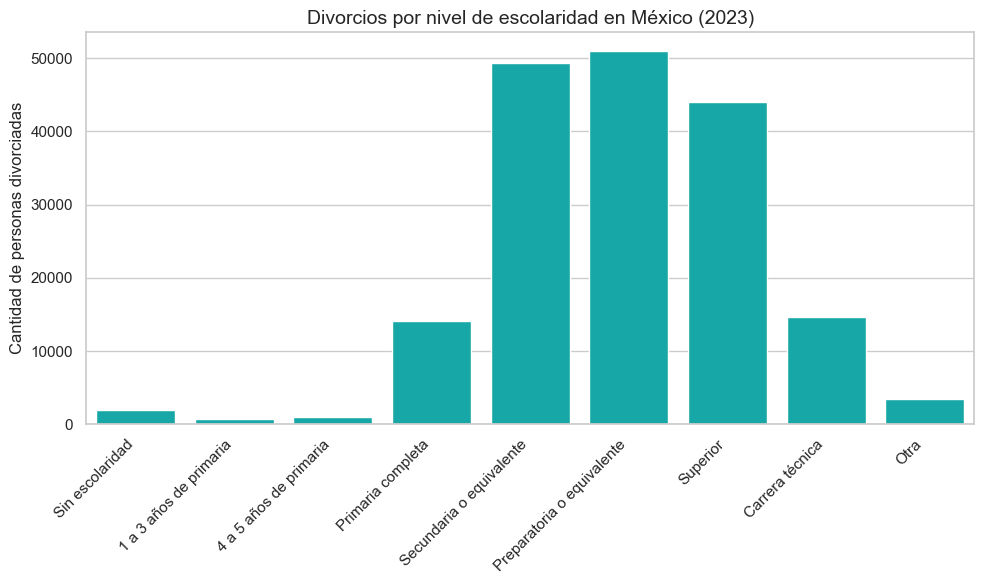

In [62]:
sns.set(style="whitegrid")
plt.rcParams["axes.titlesize"] = 14

# Asegúrate de tener tu DataFrame cargado como 'df'

# Conversión de columnas a numérico
df["escol_div1"] = pd.to_numeric(df["escol_div1"], errors="coerce")
df["escol_div2"] = pd.to_numeric(df["escol_div2"], errors="coerce")

# Diccionario de etiquetas
escolaridad_labels = {
    0: "Sin escolaridad",
    1: "1 a 3 años de primaria",
    2: "4 a 5 años de primaria",
    3: "Primaria completa",
    4: "Secundaria o equivalente",
    5: "Preparatoria o equivalente",
    6: "Superior",
    7: "Carrera técnica",
    8: "Otra"
}

# Filtrado de datos válidos
df_valid1 = df[df["escol_div1"].isin(escolaridad_labels.keys())]
df_valid2 = df[df["escol_div2"].isin(escolaridad_labels.keys())]

# Combinación de datos
escolaridad_comb = pd.concat([df_valid1["escol_div1"], df_valid2["escol_div2"]])

# Conteo y etiquetas
conteo = escolaridad_comb.value_counts().sort_index()
conteo.index = conteo.index.map(escolaridad_labels)


# ----------- Gráfica 3: Barras verticales -----------

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=conteo.index, 
    y=conteo.values, 
    color="#00BFBF"  # Todas las barras en azul
)

# Rotar y alinear etiquetas del eje X
plt.xticks(rotation=45, ha='right')

# Solo título y eje Y, sin etiqueta del eje X
plt.ylabel("Cantidad de personas divorciadas")
plt.title("Divorcios por nivel de escolaridad en México (2023)")

# No mostrar xlabel
ax.set_xlabel("")

plt.tight_layout()
plt.show()

# Inciso J

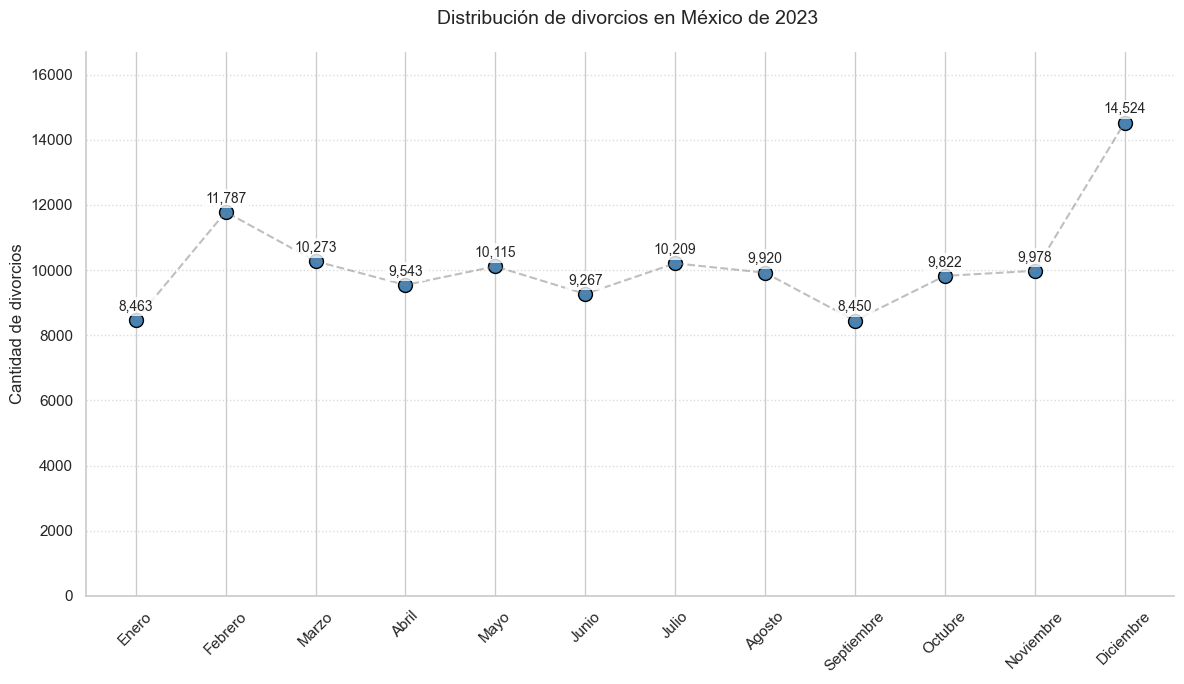

In [56]:
df["mes_mat"] = pd.to_numeric(df["mes_mat"], errors="coerce")
df = df[df["mes_mat"].between(1, 12)]

# Diccionario de nombres de meses
meses = {
    1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril",
    5: "Mayo", 6: "Junio", 7: "Julio", 8: "Agosto",
    9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"
}

# Contar cantidad de divorcios por mes
conteo_meses = df["mes_mat"].value_counts().sort_index()
conteo_meses.index = conteo_meses.index.map(meses)

plt.figure(figsize=(12, 7))

# Scatter plot
sns.scatterplot(
    x=conteo_meses.index,
    y=conteo_meses.values,
    s=100,
    color='steelblue',
    edgecolor='black',
    linewidth=1
)

# Líneas punteadas conectando puntos (opcional)
plt.plot(
    conteo_meses.index,
    conteo_meses.values,
    linestyle='--',
    color='gray',
    alpha=0.5
)

# Etiquetas de valores
for i, valor in enumerate(conteo_meses.values):
    plt.text(
        x=i, 
        y=valor + max(conteo_meses.values)*0.02,
        s=f"{valor:,}",
        ha='center',
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2)
    )

# Configuración del eje X (sin label pero con línea)
plt.xticks(rotation=45)  # Mantiene los nombres de los meses rotados
plt.xlabel('')  # Elimina la etiqueta del eje X ("Mes del año")

# Personalización restante
plt.title("Distribución de divorcios en México de 2023 ", fontsize=14, pad=20)
plt.ylabel("Cantidad de divorcios", fontsize=12)
plt.ylim(0, max(conteo_meses.values) * 1.15)
plt.grid(axis='y', linestyle=':', alpha=0.7)
sns.despine()  # Opcional: quita bordes superior y derecho

plt.tight_layout()
plt.show()



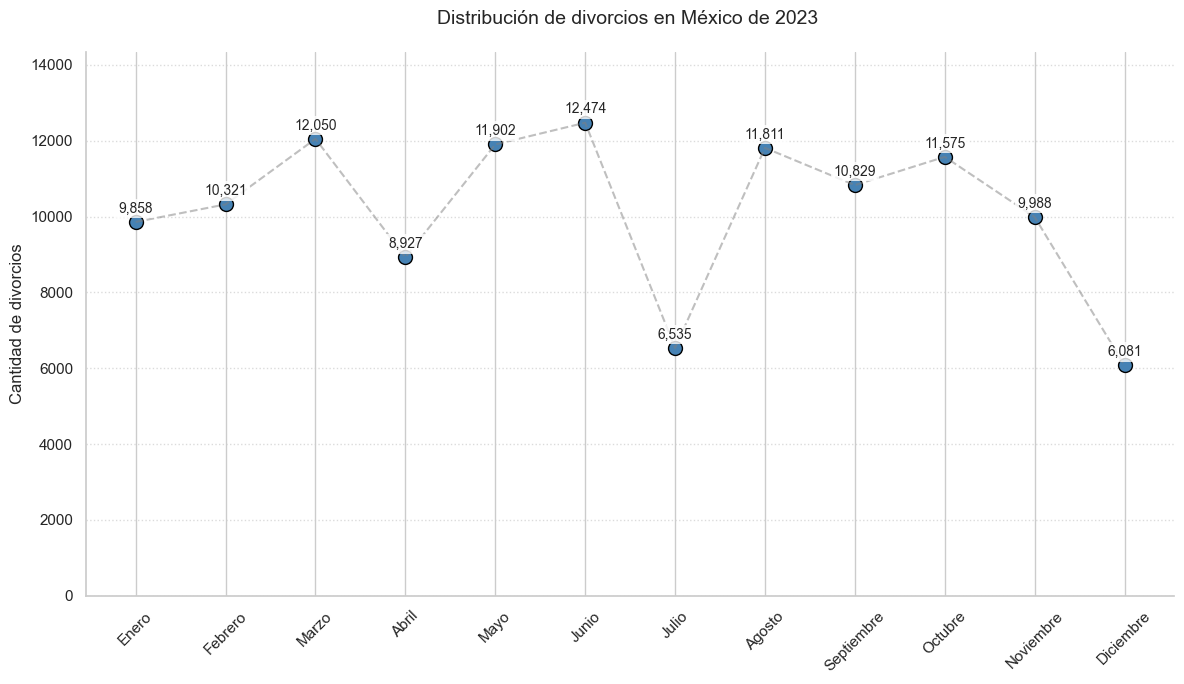

In [68]:
df["mes_eje"] = pd.to_numeric(df["mes_eje"], errors="coerce")
df = df[df["mes_eje"].between(1, 12)]

# Diccionario de nombres de meses
meses = {
    1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril",
    5: "Mayo", 6: "Junio", 7: "Julio", 8: "Agosto",
    9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"
}

# Contar cantidad de divorcios por mes
conteo_meses = df["mes_eje"].value_counts().sort_index()
conteo_meses.index = conteo_meses.index.map(meses)

plt.figure(figsize=(12, 7))

# Scatter plot
sns.scatterplot(
    x=conteo_meses.index,
    y=conteo_meses.values,
    s=100,
    color='steelblue',
    edgecolor='black',
    linewidth=1
)

# Líneas punteadas conectando puntos (opcional)
plt.plot(
    conteo_meses.index,
    conteo_meses.values,
    linestyle='--',
    color='gray',
    alpha=0.5
)

# Etiquetas de valores
for i, valor in enumerate(conteo_meses.values):
    plt.text(
        x=i, 
        y=valor + max(conteo_meses.values)*0.02,
        s=f"{valor:,}",
        ha='center',
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2)
    )

# Configuración del eje X (sin label pero con línea)
plt.xticks(rotation=45)  # Mantiene los nombres de los meses rotados
plt.xlabel('')  # Elimina la etiqueta del eje X ("Mes del año")

# Personalización restante
plt.title("Distribución de divorcios en México de 2023 ", fontsize=14, pad=20)
plt.ylabel("Cantidad de divorcios", fontsize=12)
plt.ylim(0, max(conteo_meses.values) * 1.15)
plt.grid(axis='y', linestyle=':', alpha=0.7)
sns.despine()  # Opcional: quita bordes superior y derecho

plt.tight_layout()
plt.show()